In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from sklearn import datasets
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# -1. Matrices, Gradients, Hessians

Given the function $f(x1, x2) = (1 - x1)^2 + 5 (x2 - x1^2)^2$, compute:

### a) Gradient $\nabla f(1, 1)$

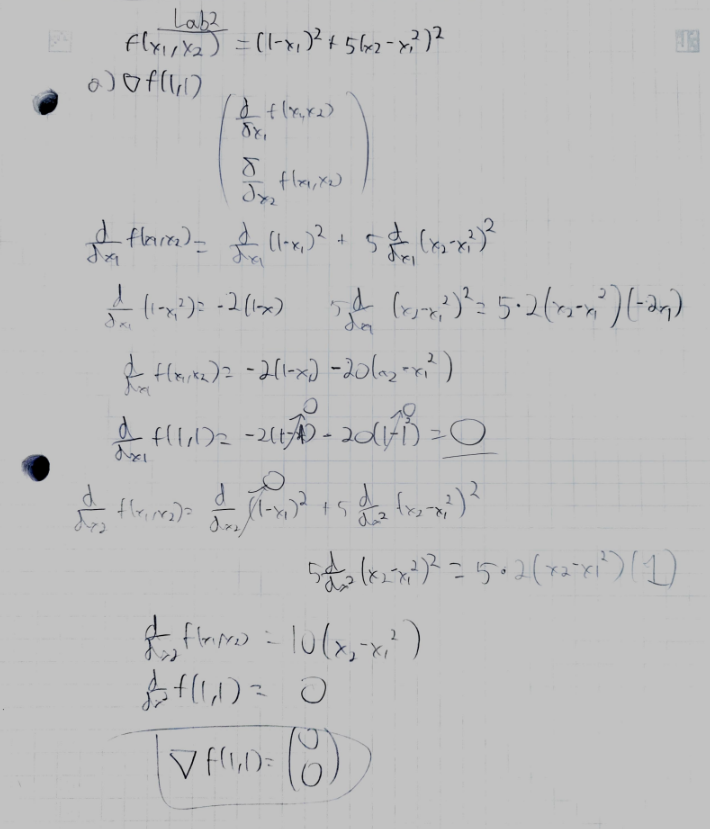

### b) Hessian $\nabla^2 f(1, 1)$

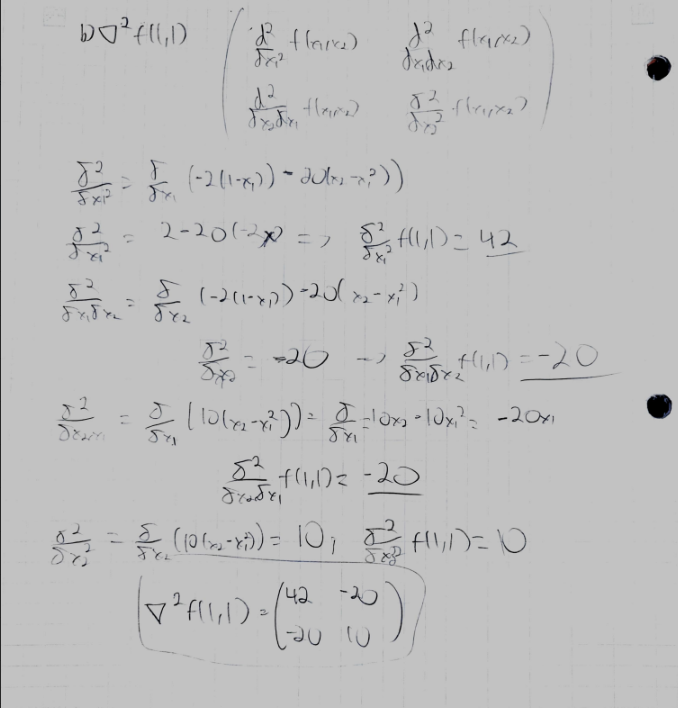

### c) Is the hessian positive definite? Why? $p^T H p > 0$

Using optimization theory, we can check leading principal minors.


1st principal minor is 42, which is **positive.**
2nd principal minor is determinant of 2x2 which is 20, which is also **positive.**

**So the Hessian is positive definite.**

# 0. Implementing 'Package' Supporting Functions

In [3]:
def relu(x):
  """Computes relu of function."""
  return x * (x >= 0)


def sigmoid(x):
  """Computes sigmoid of function."""
  return 1 / (1 + np.exp(-x))

def linear(x):
  """Return linear function of itself."""
  return x

def d_linear(x):
    return np.ones_like(x)

def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def d_relu(x):
    return (x >= 0).astype(np.float32)

activations = {
    "linear": linear,
    "relu": relu,
    "sigmoid": sigmoid
}

d_activations = {
    "linear": d_linear,
    "relu": d_relu,
    "sigmoid": d_sigmoid
}

In [4]:
def initialize_weights(shapes, outputs):
    model = []
    for i in range(len(shapes) - 1):
        # Initialize weights with uniform random values in range [-1, 1]
        weight_matrix = np.random.uniform(-1, 1, size=(shapes[i], shapes[i + 1]))
        
        # Initialize biases with zeros
        bias_vector = np.zeros(shapes[i + 1])
        
        # Get the activation function for the current layer
        activation_function = outputs[i]
        
        # Append the layer's parameters and activation function to the model
        model.append([weight_matrix, bias_vector, activation_function])
    
    return model
  #"""Initializes weights of model according to shape.
   #  Args:
    #   shapes = [784, 300, 10]
    #   outputs = ["linear", "sigmoid"]

     #returns:
      # model with uniform random weights [-1,+1], zero bias and output function
       #[
        #[random(784, 300), zeros(300), "linear"]
        #[random(300, 10), zeros(10), "sigmoid"] 
       #]

 # """

model = initialize_weights([4, 10, 3], ['sigmoid', 'sigmoid'])
print(model)
#[[w1, b1, 'sigmoid'], [w2, b2, 'sigmoid']]

[[array([[ 0.02933248,  0.01508457,  0.34782208,  0.32658025,  0.99272819,
         0.53067592, -0.34891129,  0.34048357, -0.52691582,  0.51635687],
       [ 0.73992042,  0.68499872, -0.92222626, -0.14791656,  0.24616833,
        -0.77184231,  0.90709744,  0.04530992, -0.9068055 ,  0.74881688],
       [ 0.39429355,  0.02556982,  0.09304522,  0.6519466 ,  0.42191848,
        -0.71196986, -0.10802077, -0.88429337,  0.02716814, -0.27063738],
       [-0.26913621, -0.76704127, -0.09675737, -0.85417914,  0.69062292,
         0.40191854, -0.32920818,  0.98974221, -0.12584576, -0.60969421]]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'sigmoid'], [array([[ 0.10291444, -0.89296714, -0.66899441],
       [ 0.69486637, -0.8321863 ,  0.57049168],
       [ 0.58697786,  0.25551802, -0.51348275],
       [-0.35615165,  0.16818375,  0.9148926 ],
       [-0.77812328,  0.59682971,  0.63418451],
       [ 0.89573802,  0.86412832,  0.40467596],
       [-0.9922398 , -0.23073282, -0.14992088],
       [-0

In [5]:
def forward(x, model):
    """Performs forward pass of training step.

     Args:
       x: input tensor of shape (B, N0)
       model: list of model weights (see initialize weights)
     Returns:
       List containing dictionary { "y": y, "z": z } for each layer of network.
       [{"y": y1, "z": z1}, {"y": y2, "z": z2}]
    """
    result = []
    y = x
    for layer in model:
      # layer = [ w[i], b[i], 'relu']
      z = np.dot(y, layer[0]) + layer[1]  # (B,N1) + (N1,N2)
      y = activations[layer[2]](z)
      result.append({'y': y, 'z': z})
    
    return result

In [6]:
def predict(x, model):
  """Predicts the output of a model.

     Args:
       x: input tensor of shape (B, Ni)
       model: list of model weights (see initialize weights)
     Returns:
       Prediction of model, with the same shape as the labeled data (B, No).
  """
  fwd = forward(x, model)
  return fwd[-1]["y"]

In [7]:
def backward(y, x, model, loss):
#  """Computes backward step of training.
#     Args:
#       y: labeled data of size (B, No) 
#       x: input tensor of shape (B, Ni)
#       model: list of model weights (see initialize weights)
#       loss: one of ("mse", "binary_crossentropy")
#     Returns:
#       tuple with loss evaluation of (y, predict(x)) and list of dictionary
#       containing { "dw": dw, "db": db } for each layer of network. Remember
#       that shape of dw for each layer should be equal to shape of weight for
#       the same layer.
#       [{"dw": dw1, "db": db1}, {"dw": dw2, "db": db2}]
#  """
  # add backward here
    #result = []
    #a = x
    #b = y
    #for layer in model:
        
  #pass
    fwd_results = forward(x,model)
    gradients = []
    n_layers = len(model)
    #print("Model length ", n_layers)
    loss_name = loss
    # Compute the initial gradient based on the loss function
    y_pred = fwd_results[-1]['y']
    if loss_name == "mse":
        # Derivative of Mean Squared Error
       # print("y_pred ", [y_pred.shape])
       
        #print("y0 ", [y.shape[0]])
        y = y.reshape(-1,1)
        #print("y in backward ", [y.shape])
        
        loss_grad = 2 * (y_pred - y) / y.shape[0]
        loss_value = mse(y, y_pred)  # Use the mse function to compute the loss value
    elif loss_name == "binary_crossentropy":
        # Derivative of Binary Crossentropy
        #y = y.reshape(-1,1)
        epsilon = 1e-15
        loss_grad = (y_pred - y) / (y_pred * (1 - y_pred) + epsilon)
        #print("loss_grad", [loss_grad.shape], loss_grad)
        
        loss_value = binary_crossentropy(y, y_pred)  # Use the binary_crossentropy function to compute the loss value

    # Backpropagation
    for i in reversed(range(n_layers)):
        layer = model[i]
        activation = layer[2]
        z = fwd_results[i]['z']
        d_activation = d_activations[activation](z)
        
        # Gradient for the current layer
        #print(loss_name)
        #print("loss_grad ", [loss_grad.shape])
        #print("d_activation ", [d_activation.shape])
        delta = loss_grad * d_activation  # Element-wise multiplication
        #print("delta ",[delta.shape])

   #     x = np.array(x).reshape((-1, 13))
   #     print("Type of x:", type(x))
   #     print("Shape of x:", x.shape if isinstance(x, np.ndarray) else "x is not a numpy array")
   #     print("fwd_results:", fwd_results)
        
        y_input = fwd_results[i-1]['y'] if i > 0 else x
        #print("y_input ", [y_input.shape])
        #print(f"Layer {i}: delta shape: {delta.shape}, loss_grad shape: {loss_grad.shape}, d_activation shape: {d_activation.shape}")
        
        dw = np.dot(y_input.T, delta)  # Gradient w.r.t. weights
        db = np.sum(delta, axis=0)  # Gradient w.r.t. biases
       # print("dw ", [dw.shape])
       # print("db ", [db.shape])
        gradients.insert(0, {'dw': dw, 'db': db})  # Insert at beginning to match layer order
        
        # Compute gradient for next layer
        if i > 0:
            loss_grad = np.dot(delta, layer[0].T)

    #print([gradients.shape])
    return loss_value, gradients

In [8]:
def update(weights, dweights, alpha):
  """Gradient descent for weights and biases."""
  for i in range(len(weights)):
   #print("Shape of weights:", weights[i][0].shape)
    #print("Shape of weight gradients:", dweights[i]["dw"].shape)
    weights[i][0] += - alpha * dweights[i]["dw"]
    weights[i][1] += - alpha * dweights[i]["db"]

In [9]:
def mse(y, p):
  """Computes Mean-Square Error between y and p.
     Args:
       y: labeled data of size (B, No) 
       p: predicted label of size (B, No)
     Returns:
       MSE of y-p
  """
  #assert p.shape == y.shape
  return np.mean((y - p)**2)

def binary_crossentropy(y, p):
#  """Computes binary crossentropy between y and p.
#     Args:
#       y: labeled data of size (B, No) 
#       p: predicted label of size (B, No)
#     Returns:
#       BCE of (y, p) = mean(sum(y log(p) + (1-y) log(1-p))) 
#  """
  # add computation of binary crossentropy
    epsilon = 1e-15
    p = np.clip(p, epsilon, 1 - epsilon)
    return np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

# 1. Creating and Training Linear Regression on Boston Dataset

In [10]:
def load_data():
    (x_train, y_train), (x_test, y_test) = boston_housing.load_data()
    
    # Normalize or Standardize Features
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Add Bias Term - append a column of 1's to the feature matrix
    #x_train = np.concatenate((np.ones((x_train.shape[0], 1)), x_train), axis=1)
   # x_test = np.concatenate((np.ones((x_test.shape[0], 1)), x_test), axis=1)
    #print([x_train.shape])
    #print([y_train.shape])
    return (x_train, y_train), (x_test, y_test)
#load_data()

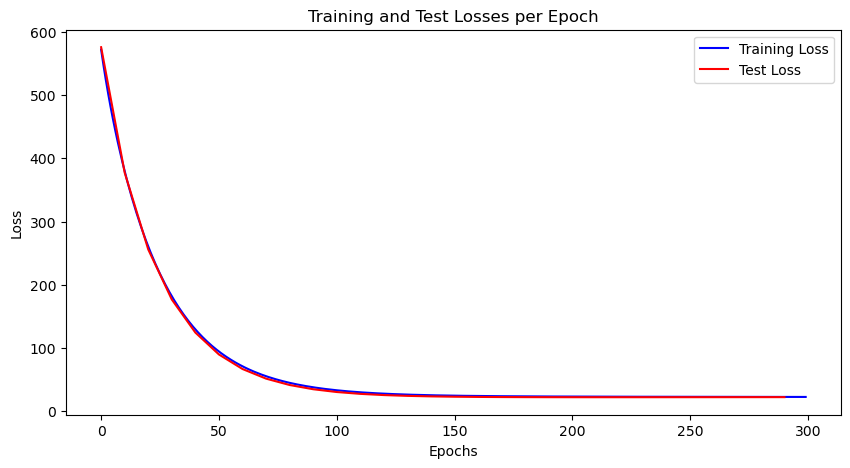

In [11]:
def train_network():
  (x_train, y_train), (x_test, y_test) = load_data()

  # linear network
  # plot training and test loss over time in jupyter notebook

  shapes = [x_train.shape[1], 1]
    
  #print("x ", shapes)


  #print("y ", [y_train.shape])
  outputs = ["linear"]
  model = initialize_weights(shapes, outputs)
  #x_train_reshaped = x_train.reshape(-1, 14)
  fwd_results = forward(x_train, model)
  #print("fwd " , len(fwd_results))
  #print(fwd_results)
  fwd_results = np.array(fwd_results)
  #print("fwdtens ", len(fwd_results))
  # what's the alpha you should use?

  alpha = 0.01
  train_losses = []
  test_losses = []

  for i in range(300):

    loss, dweights = backward(y_train, x_train, model, "mse")
    #print("model ", [model.shape])
   # print(len(model))
   # print([dweights.shape])
    update(model, dweights, alpha)
    #print(i, loss)

    train_losses.append(loss)
    if i % 10 == 0:
        test_loss, _ = backward(y_test, x_test, model, "mse")  # Calculate test loss (discard gradients)
        test_losses.append(test_loss)
        
  plt.figure(figsize=(10, 5))
  plt.plot(train_losses, label='Training Loss', color='blue')
  plt.plot(range(0, 300, 10), test_losses, label='Test Loss', color='red')  # Plotting at intervals
  plt.title('Training and Test Losses per Epoch')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
train_network()

- Change training function to collect training and test loss

# 2. Classification on Iris Dataset

In [34]:
def load_iris():
  iris = datasets.load_iris()
  x = iris.data.astype(np.float32)
  y = iris.target

  y = to_categorical(y, np.max(y)+1).astype(np.float32)
    
  x_train, y_train, x_test, y_test = train_test_split(x,y)
  # (B,) -> {0, 1, 2}
  # (B, 3) -> 0 -> y[:, 0] = 1, 1 -> y[:, 1] = 1

  # need to do conditioning on the dataset

  return (x_train, y_train), (x_test, y_test)

[3, 30, 10, 3]


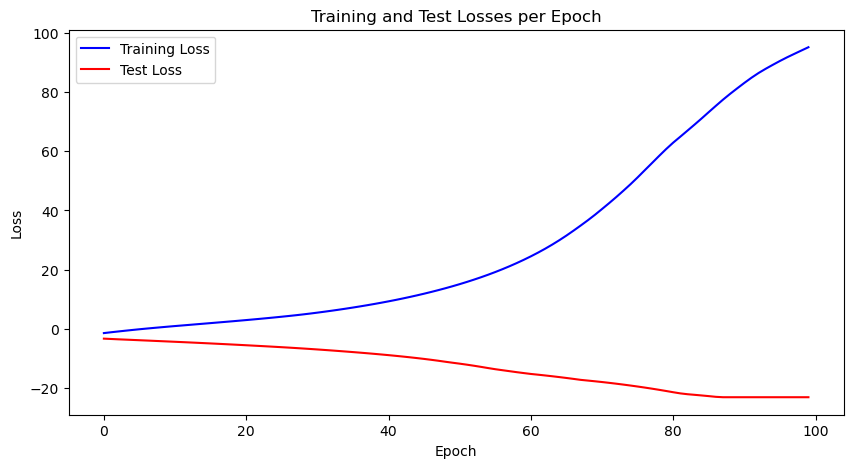

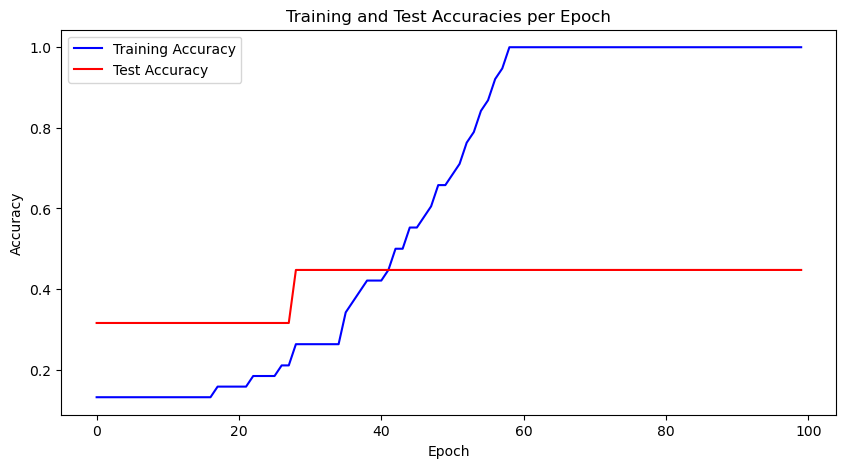

In [55]:
def accuracy(y, p): # (B, 3)
    # y = (1, 0, 0), p = (0.2, 0.5, 0.3)
    # y = 0, p = 1
    return np.mean(np.argmax(y, axis=-1) == np.argmax(p, axis=-1))

def train_network():
  (x_train, y_train), (x_test, y_test) = load_iris()
     # Normalize or Standardize Features
  # example of network. try your own to get higher accuracy
  # plot training and test loss over time in jupyter notebook
  # plot training and test accuracy over time in jupyter notebook 
  
  outputs = ["relu", "relu", "sigmoid"]
  x_train_reduced = x_train[:38, :3]
  y_train_reduced = y_train[:,:3]
  x_test_reduced = x_test[:38, :3]
  y_test_reduced = y_test[:,:3]

  scaler = StandardScaler()
  x_train_reduced = scaler.fit_transform(x_train_reduced)
  x_test_reduced = scaler.transform(x_test_reduced)
  #print([x_train_reduced.shape])
  #print("xtext ",[x_test.shape])
  #print("ytest ",[y_test.shape])
  shapes = [x_train_reduced.shape[1], 30, 10, y_train_reduced.shape[1]]
  print(shapes)
  # which alpha should you use?
  alpha = .00003
  model = initialize_weights(shapes, outputs)

  train_losses = []
  test_losses = []
  train_accuracies = []
  test_accuracies = []

    
  #print(len(model))
  for i in range(100):
    loss, dweights = backward(y_train_reduced, x_train_reduced, model, "binary_crossentropy")
    update(model, dweights, alpha)
    #print(i, loss)
    train_losses.append(loss)
  # Predict on train set and calculate accuracy
    y_train_pred = forward(x_train_reduced, model)[-1]['y']
    train_acc = accuracy(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # Calculate test loss (without updating model)
    test_loss, _ = backward(y_test_reduced, x_test_reduced, model, "binary_crossentropy")
    test_losses.append(test_loss)
    

        # Predict on test set and calculate accuracy
    y_test_pred = forward(x_test_reduced, model)[-1]['y']
    test_acc = accuracy(y_test_reduced, y_test_pred)
    test_accuracies.append(test_acc)
  #print(test_losses)
  #print(len(test_losses))
  #print(len(train_losses))


    # Plot training and test losses
  plt.figure(figsize=(10, 5))
  plt.plot(train_losses, label='Training Loss', color='blue')
  plt.plot(test_losses, label='Test Loss', color='red')
  plt.title('Training and Test Losses per Epoch')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

    # Plot training and test accuracies
  plt.figure(figsize=(10, 5))
  plt.plot(train_accuracies, label='Training Accuracy', color='blue')
  plt.plot(test_accuracies, label='Test Accuracy', color='red')
  plt.title('Training and Test Accuracies per Epoch')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()
      
train_network()

# 3. Packages These Days Use Automatic Differentiation Like AutoGrad

In [ ]:
import autograd.numpy as np
from autograd import elementwise_grad as grad

In [ ]:
x = np.arange(6).astype(np.float32)
x

In [ ]:
def f(x):
    return 3.0 * np.power(x, 2) + 5.0 * x - 4.0

In [ ]:
grad_f = grad(f)

In [ ]:
grad_f(x)

In [ ]:
(f(x + 0.01) - f(x - 0.01)) / 0.02

Comments:

1. I said in the class to always check the shapes to see the operations. dw and w have transposed shapes.
2. If you look at the notes, you will see that y's and z's have the same shape
3. If you need to debug on the fly, put the following line in the code. You can search on the web but basically, you can do step by step computation with pdb.

```python
import pdb; pdb.set_trace()
```